# Decaimiento del pión

In [101]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
from distutils.spawn import find_executable

from matplotlib.font_manager import *
from matplotlib.collections import *
from matplotlib.patches import *
from matplotlib.pylab import *
from matplotlib import colors

import seaborn

rem = 14

seaborn.set(context='notebook', style='darkgrid')

ioff()

rc('lines', linewidth=1)
rc('font', family='serif')
rc('font', size=rem)
rc('axes', titlepad=1.500*rem)
rc('axes', titlesize=1.728*rem)
rc('axes', labelsize=1.200*rem)
rc('legend', fontsize=1.000*rem)
rc('xtick', labelsize=0.833*rem)
rc('ytick', labelsize=0.833*rem)

if find_executable('latex'):
    rc('text', usetex=True)

material_palette = {
    -10: "#fafafa",
    -9: "#f5f5f5",
    -6: "#bdbdbd",
    -5: "#9e9e9e",
    -4: "#757575",
    -1: "#212121",
    0: "#F44336",
    1: "#E91E63",
    2: "#9C27B0",
    3: "#673AB7",
    4: "#3F51B5",
    5: "#2196F3",
    6: "#03A9F4",
    7: "#00BCD4",
    8: "#009688",
    9: "#4CAF50",
    10: "#8BC34A",
    11: "#CDDC39",
    12: "#FFEB3B",
    13: "#FFC107",
    14: "#FF9800",
    15: "#FF5722",
}

In [5]:
dataset = np.loadtxt("data/120GeV-100k.csv", delimiter = ",")

In [6]:
E_pi = dataset[:,0]
theta_pi = dataset[:,1]
phi_pi = dataset[:,2]
n = E_pi.shape[0]
n_bins = 40

print(f"Samples: {n}")
print(f"No. of bins: {n_bins}")

Samples: 278042
No. of bins: 40


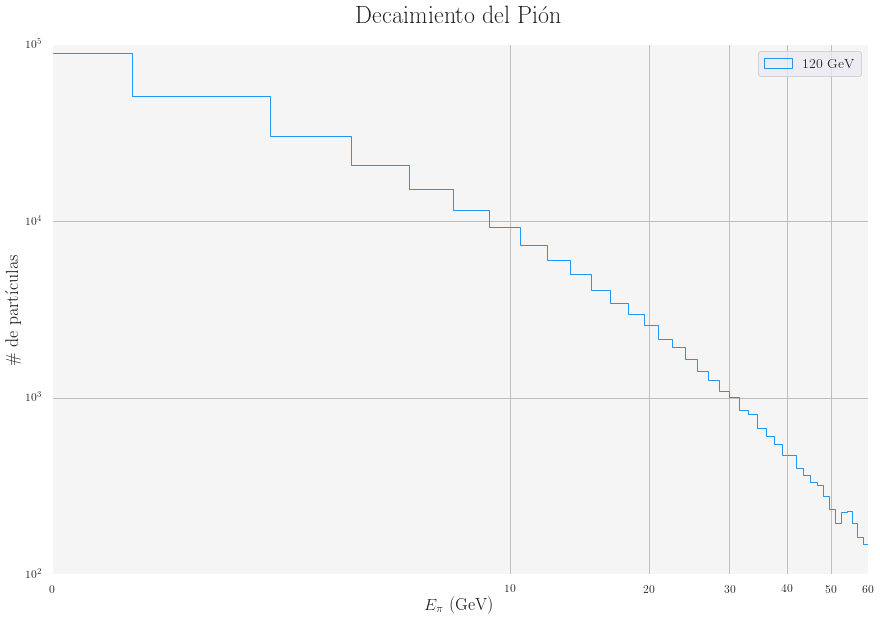

In [34]:
fig = figure(1, figsize=(9.75 * 1.5, 6.50 * 1.5))#, frameon=False)
axs = fig.add_subplot('111', facecolor=material_palette[-9])
#axs.set_frame_on(False)

axs.hist(E_pi, bins=n_bins, histtype="step", color=material_palette[5], range=(0, 60), label="120 GeV")

axs.set_xscale("log")
axs.set_xlim(1, 60)
axs.set_xlabel("$E_\pi$ (GeV)")
axs.set_xticks([1] + [x for x in range(10, 70, 10)])
#axs.set_xticklabels(["$10^0$"] + ["${0} \\times 10^1$".format(int(x/10)) if x/10 > 1 else "$10^1$" for x in range(10, 70, 10)])
axs.set_xticklabels(x for x in range(0, 70, 10))

axs.set_yscale("log")
axs.set_ylim(10 ** 2, 10 ** 5)
axs.set_ylabel("\# de partículas")
axs.set_yticks([10 ** x for x in range(2, 6, 1)])
axs.set_yticklabels(["$10^{0}$".format(x) for x in range(2, 6, 1)])

axs.set_title("Decaimiento del Pión")

axs.legend(loc=0)
axs.grid(linestyle='-', color=material_palette[-6])
#fig.tight_layout()
show()

### Ángulo del pión. Theta inicial del ángulo del pión

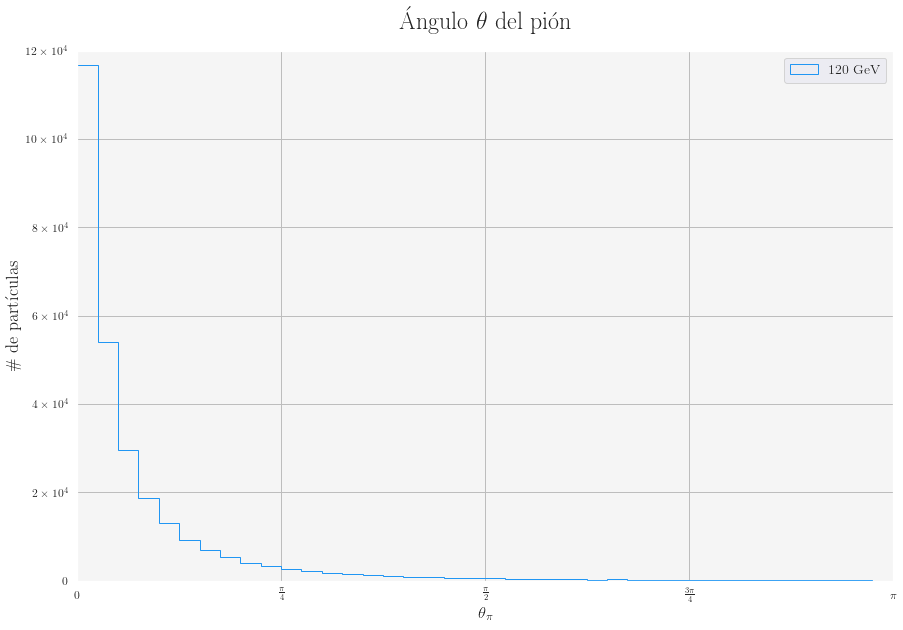

In [36]:
fig = figure(2, figsize=(9.75 * 1.5, 6.50 * 1.5))#, frameon=False)
axs = fig.add_subplot('111', facecolor=material_palette[-9])
#axs.set_frame_on(False)

axs.hist(theta_pi, bins=n_bins, histtype="step", color=material_palette[5], label="120 GeV")

axs.set_xlim(0, np.pi)
axs.set_xlabel(r"$\theta_\pi$")
axs.set_xticks([0.00, 0.25 * np.pi, 0.50 * np.pi, 0.75 * np.pi, 1.00 * np.pi])
axs.set_xticklabels(["0", r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$", r"$\frac{3 \pi}{4}$", r"$\pi$"])

axs.set_ylim(0, 12 * 10 ** 4)
axs.set_ylabel("\# de partículas")
axs.set_yticks([x * 10 ** 4 for x in range(0, 13, 2)])
axs.set_yticklabels(["0"] + ["${0} \\times 10^4$".format(x) for x in range(2, 13, 2)])

axs.set_title(r"Ángulo $\theta$ del pión")

axs.legend(loc=0)
axs.grid(linestyle='-', color=material_palette[-6])
#fig.tight_layout()
show()

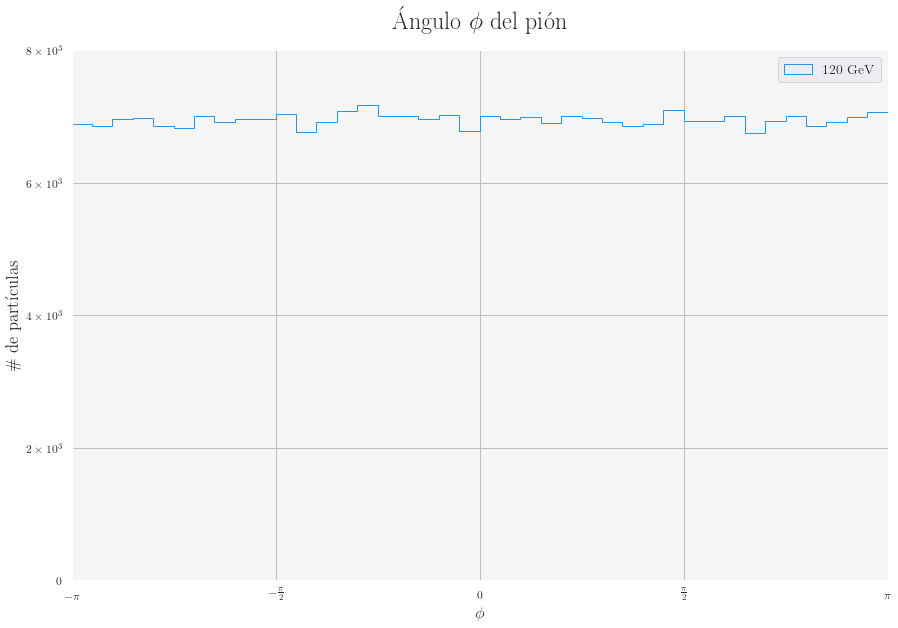

In [38]:
fig = figure(3, figsize=(9.75 * 1.5, 6.50 * 1.5))#, frameon=False)
axs = fig.add_subplot('111', facecolor=material_palette[-9])

axs.hist(phi_pi, bins=n_bins, histtype="step", color=material_palette[5], label="120 GeV")

axs.set_xlim(0, np.pi)
axs.set_xlabel(r"$\phi$")
axs.set_xticks([-1.00 * np.pi, -0.50 * np.pi, 0.00, 0.50 * np.pi, 1.00 * np.pi])
axs.set_xticklabels([r"$-\pi$", r"$-\frac{\pi}{2}$", "0", r"$\frac{\pi}{2}$", r"$\pi$"])

axs.set_ylim(0, 8 * 10 ** 3)
axs.set_ylabel("\# de partículas")
axs.set_yticks([x * 10 ** 3 for x in range(0, 9, 2)])
axs.set_yticklabels(["0"] + ["${0} \\times 10^3$".format(x) for x in range(2, 9, 2)])

axs.set_title(r"Ángulo $\phi$ del pión")

axs.legend(loc=0)
axs.grid(linestyle='-', color=material_palette[-6])
#fig.tight_layout()
show()

In [16]:
m_pi =0.1396  # GeV, masa del pion
m_mu = 0.10566 # GeV, masa del muon

tau_0_pi = 2.6 * 10 ** (-8)  # GeV, tiempo de vida media propio pion

In [17]:
# Equivalente a los tiempos de decaimiento de los piones
g = E_pi / m_pi * tau_0_pi * np.log(1 / (1 - np.random.uniform(size=(1,n))[0]))

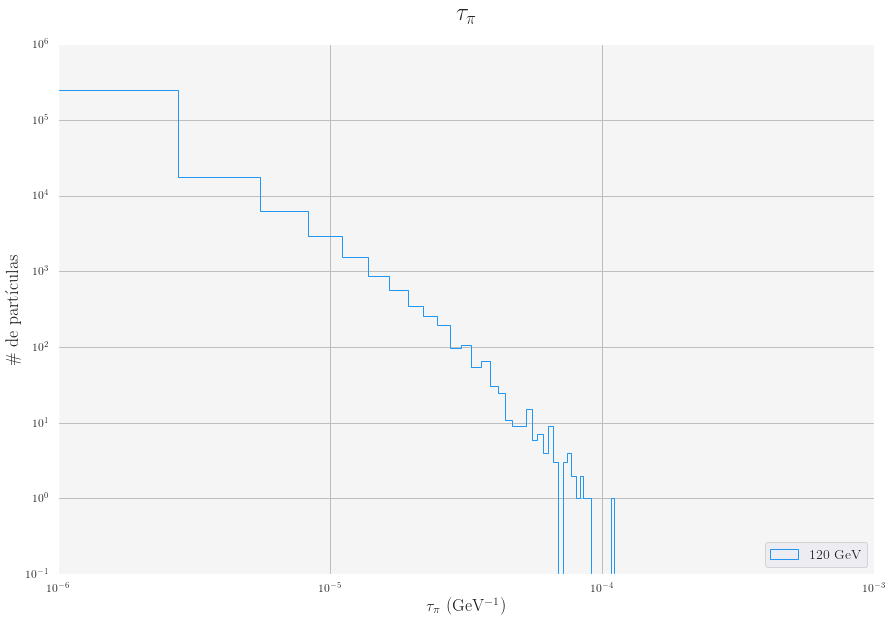

In [54]:
fig = figure(4, figsize=(9.75 * 1.5, 6.50 * 1.5))#, frameon=False)
axs = fig.add_subplot('111', facecolor=material_palette[-9])

axs.hist(g, bins=n_bins, histtype="step", color=material_palette[5], label="120 GeV")

axs.set_xscale("log")
axs.set_xlim(10 ** -6, 10 ** -3)
axs.set_xlabel("$\\tau_\pi$ (GeV$^{-1}$)")

axs.set_yscale("log")
axs.set_ylim(10 ** -1, 10 ** 6)
axs.set_ylabel("\# de partículas")

#axs.set_title(r"Tiempo de decaimiento del pion")
axs.set_title(r"$\tau_\pi$")

axs.legend(loc=4)
axs.grid(linestyle='-', color=material_palette[-6])
#fig.tight_layout()

#inset_axs = fig.add_axes([.65, .6, .3, .3])
#inset_axs.hist(g, bins=n_bins, histtype="step", color=material_palette[5], label="120 GeV")

#inset_axs.set_xscale("log")
#inset_axs.set_xlim(10 ** -13, 10 ** -3)

#inset_axs.set_yscale("log")
#inset_axs.set_ylim(10 ** -1, 10 ** 6)

show()

### Velocidad del pión

In [74]:
v_pi = np.sqrt(1 - m_pi ** 2 / E_pi ** 2)

vx_pi = v_pi * np.sin(theta_pi) * np.cos(phi_pi)
vy_pi = v_pi * np.sin(theta_pi) * np.sin(phi_pi)
vz_pi = v_pi * np.cos(theta_pi)

d = v * g * 3e+8

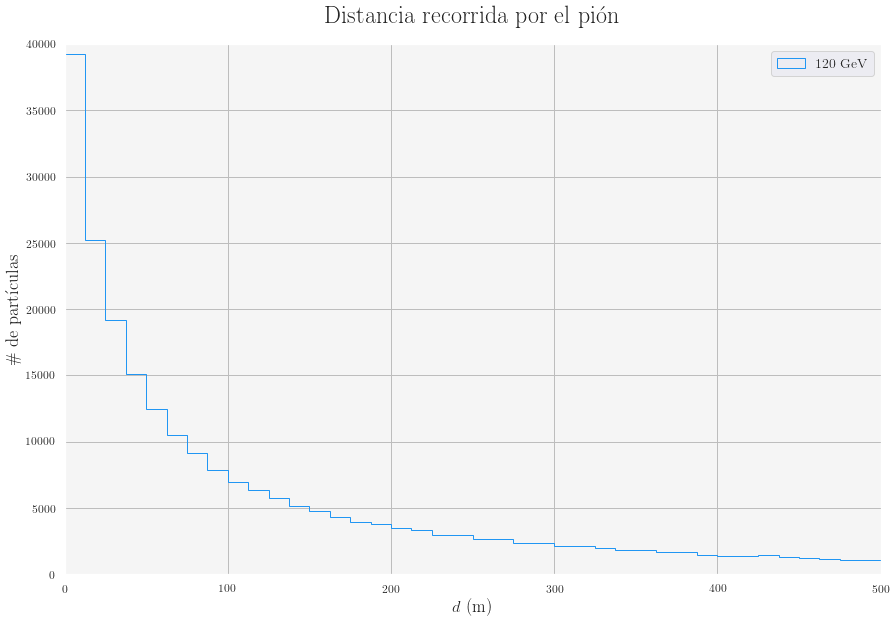

In [47]:
fig = figure(5, figsize=(9.75 * 1.5, 6.50 * 1.5))#, frameon=False)
axs = fig.add_subplot('111', facecolor=material_palette[-9])

axs.hist(d, bins=n_bins, histtype="step", range=(0, 500), color=material_palette[5], label="120 GeV")

axs.set_xlim(0, 500)
axs.set_xlabel("$d$ (m)")

axs.set_ylim(0, 40 * 10 ** 3)
axs.set_ylabel("\# de partículas")

axs.set_title(r"Distancia recorrida por el pión")

axs.legend(loc=0)
axs.grid(linestyle='-', color=material_palette[-6])
#fig.tight_layout()
show()

# Centro de masa (Pre-Boosting)

In [56]:
#angulos en el centro de masa
phi_cm_pi = np.random.uniform(0,2*np.pi, size=(1,n))[0]
theta_cm_pi = np.random.uniform(0,np.pi,size=(1,n))[0]

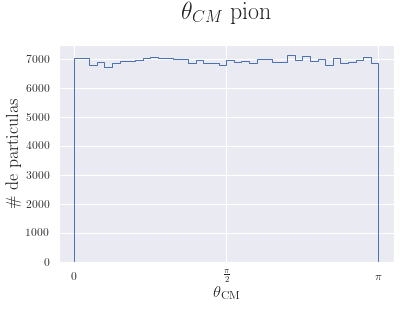

In [57]:
plt.hist(theta_cm_pi, bins = n_bins, histtype = 'step')
plt.xticks([0, np.pi/2, np.pi], ('0', r'$\frac{\pi}{2}$', r'$\pi$'))
plt.xlabel(r'$\theta_{\mathrm{CM}}$')
plt.ylabel('\# de particulas')
plt.title(r'$\theta_{CM}$ pion')
plt.show()

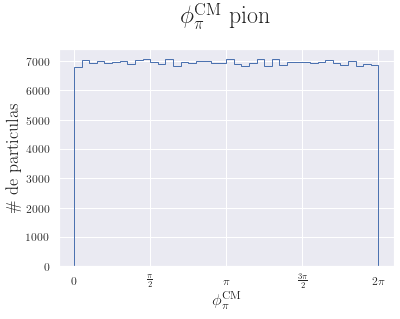

In [64]:
plt.hist(phi_cm_pi, bins = n_bins, histtype = 'step')
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ('0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'))
plt.xlabel(r'$\phi^{\mathrm{CM}}_\pi$')
plt.ylabel('\# de particulas')
plt.title(r'$\phi^{\mathrm{CM}}_\pi$ pion')
plt.show()

In [65]:
#energias en el centro de masa
#para representar el neutrino se usara la letra v parecida a la letra griega nu
E_mu= (m_mu**2 + m_pi**2)/(2*m_pi) 
E_v= (m_pi**2 - m_mu**2)/(2*m_pi) 

In [68]:
#modulo de momentos en el centro de masa
p_mu = np.sqrt(E_mu**2 - m_mu**2) 
p_v = E_v

In [73]:
#componentes del momento
px_mu = p_mu*np.sin(theta_cm_pi)*np.cos(phi_cm_pi)
py_mu = p_mu*np.sin(theta_cm_pi)*np.sin(phi_cm_pi)
pz_mu = p_mu*np.cos(theta_cm_pi)

px_v = p_v*np.sin(np.pi - theta_cm_pi)*np.cos(np.pi + phi_cm_pi)
py_v = p_v*np.sin(np.pi - theta_cm_pi)*np.sin(np.pi + phi_cm_pi)
pz_v = p_v*np.cos(np.pi - theta_cm_pi)

# Boosting

In [82]:
#boost de la energia
E_mu_lab = (E_pi/m_pi)*(E_mu + vx_pi*px_mu + vy_pi*py_mu + vz_pi*pz_mu)
E_v_lab=(E_pi/m_pi)*(E_v + vx_pi*px_v + vy_pi*py_v + vz_pi*pz_v)

In [92]:
vdotp_mu = vx_pi*px_mu + vy_pi*py_mu + v_z_pi*pz_mu

px_mu_lab = px_mu - vx_pi*(vdotp_mu/v_pi**2) + (E_pi/m_pi) *(vx_pi*(vdotp_mu/v_pi**2) + vx_pi*E_mu)
py_mu_lab = py_mu - vy_pi*(vdotp_mu/v_pi**2) + (E_pi/m_pi) *(vy_pi*(vdotp_mu/v_pi**2) + vy_pi*E_mu)
pz_mu_lab = pz_mu - vz_pi*(vdotp_mu/v_pi**2) + (E_pi/m_pi) *(vz_pi*(vdotp_mu/v_pi**2) + vz_pi*E_mu)

In [93]:
vdotp_v = vx_pi*px_v + vy_pi*py_v + v_z_pi*pz_v

px_v_lab = px_v - vx_pi*(vdotp_v/v_pi**2) + (E_pi/m_pi) *(vx_pi*(vdotp_v/v_pi**2) + vx_pi*E_v)
py_v_lab = py_v - vy_pi*(vdotp_v/v_pi**2) + (E_pi/m_pi) *(vy_pi*(vdotp_v/v_pi**2) + vy_pi*E_v)
pz_v_lab = pz_v - vz_pi*(vdotp_v/v_pi**2) + (E_pi/m_pi) *(vz_pi*(vdotp_v/v_pi**2) + vz_pi*E_v)

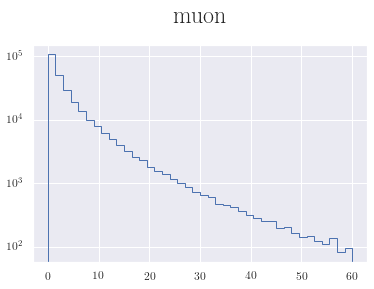

In [94]:
plt.hist(E_mu_lab, bins = n_bins, histtype="step", range=(0, 60))
plt.title('muon')
plt.yscale('log')
plt.show()

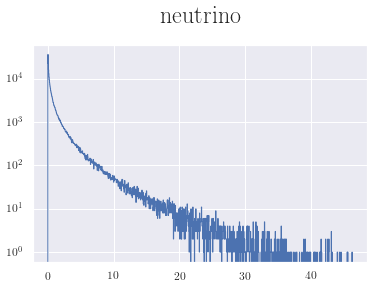

In [118]:
plt.hist(E_v_lab, bins='auto', histtype = 'step')
plt.title('neutrino')
plt.yscale('log')
plt.show()

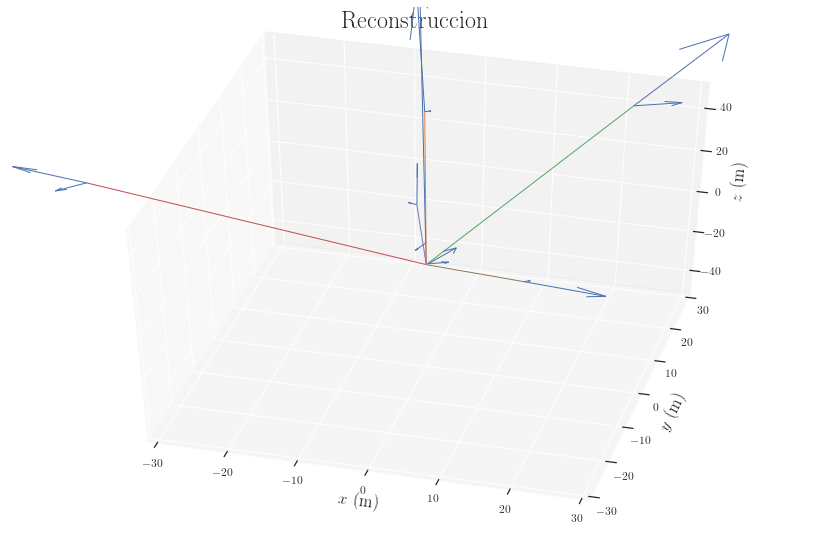

In [129]:
from mpl_toolkits.mplot3d import axes3d
from IPython.display import clear_output
from IPython.display import display
from time import sleep

import gc

fig = figure(6, figsize=(9.75 * 1.5, 6.50 * 1.5))#, frameon=False)
axs = fig.add_subplot('111', facecolor=material_palette[-9], projection='3d')
axs.patch.set_alpha(0)
    
for i in range(20):
    if d[i] < 100:
        x_pi = d[i]*np.sin(theta_pi[i])*np.cos(phi_pi[i])
        y_pi = d[i]*np.sin(theta_pi[i])*np.sin(phi_pi[i])
        z_pi = d[i]*np.cos(theta_pi[i])

        axs.plot3D([0, x_pi] ,[0, y_pi], [0, z_pi])
        
        axs.quiver(x_pi, y_pi, z_pi, px_mu_lab[i]/p_mu, py_mu_lab[i]/p_mu, pz_mu_lab[i]/p_mu)
        
        axs.quiver(x_pi, y_pi, z_pi, px_v_lab[i]/p_v, py_v_lab[i]/p_v, px_v_lab[i]/p_v)
        
axs.set_xlabel("$x$ (m)")
axs.set_xlim([-30, 30])

axs.set_ylabel("$y$ (m)")
axs.set_ylim([-30, 30])

axs.set_zlabel("$z$ (m)")
axs.set_zlim([-50, 50])

axs.set_title(r"Reconstruccion")
axs.view_init(45, 285)

show()